# 可视化统计关系 - Visualizing statistical relationships

- `scatterplot()` (with `kind="scatter`; the default)
- `lineplot` (with `kind="line"`)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

## 散点图 - Scatter Plot

### 都是数值类型

**hue 语义属性**

- 对于分类数据, hue 语义默认采用 "定性调色板" (qualitative palette)
- 对于数值数据, hue 语义默认采用 "顺序调色板" (sequential palette)

In [3]:
tips = pd.read_csv("../../data/tips.csv")

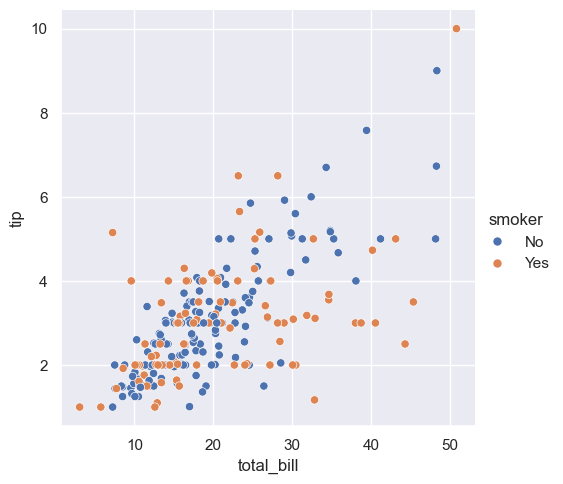

In [4]:
# qualitative palette
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

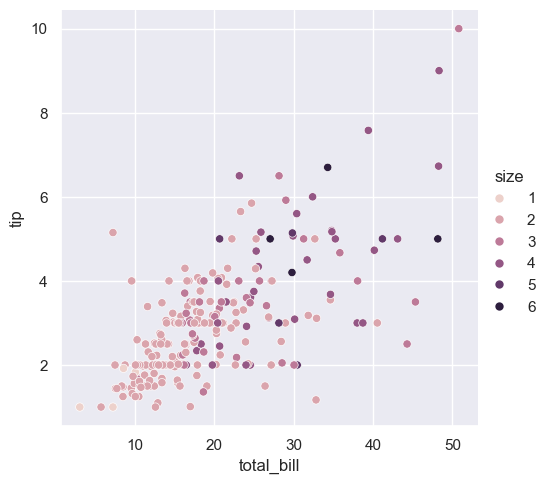

In [5]:
# sequential palette
sns.relplot(data=tips, x="total_bill", y="tip", hue="size")

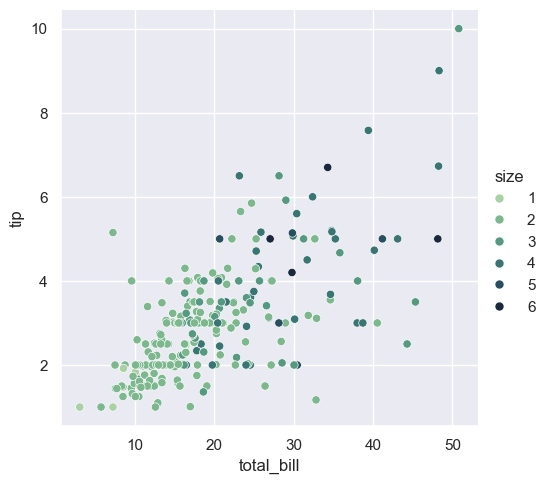

In [6]:
# customize palette
sns.relplot(data=tips, x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75")

自定义调色板具体解释如下：

- "ch"：表示使用CUBEHELIX颜色系统（cubehelix color system）。这是一个在色相、亮度和色度之间平衡的颜色系统，常用于数据可视化，因为它在黑白打印时也能保持良好的区分度。

- "r=-.5"：调整颜色轮的旋转（rotation）。r 参数表示颜色轮旋转的角度。-.5 表示逆时针旋转0.5圈（180度）。正值会顺时针旋转，负值会逆时针旋转。旋转角度影响调色板的色相（hue）。

- "l=.75"：调整亮度（lightness）。l 参数表示亮度的起始值。.75 表示调色板中的颜色将从75%的亮度开始。这意味着颜色会比较亮。亮度范围通常在0（最暗）到1（最亮）之间。

总的来说，"ch:r=-.5,l=.75" 定义了一个从75%亮度开始，颜色逆时针旋转180度的CUBEHELIX调色板。这种调色板设计用于在视觉上区分不同数据点的类别（由 hue 参数指定），并确保在各种展示环境下（包括黑白打印）保持良好的可辨性。

## 通过折线图强调连续性

散点图非常有效，但没有普遍适用的最佳可视化类型。相反，视觉表示应根据数据集的具体情况以及你试图通过图表回答的问题进行调整。

对于某些数据集，你可能想要了解一个变量随时间或其他类似连续变量的变化。在这种情况下，绘制折线图是一个不错的选择。在 Seaborn 中，可以通过 `lineplot()` 函数直接实现，也可以通过设置 `kind="line"` 使用 `relplot()` 来完成。

In [7]:
dowjones_ori = pd.read_csv("../../data/dowjones.csv")

In [8]:
dowjones = (
    dowjones_ori.convert_dtypes()
    .astype({"Date": "datetime64[ms]"})
    .assign(Year=lambda x: x.Date.dt.year)
)

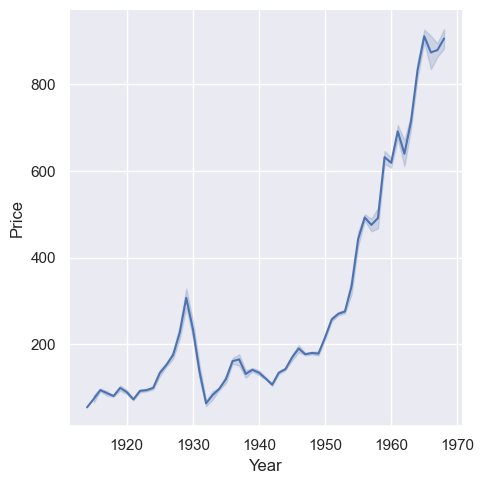

In [9]:
sns.relplot(data=dowjones, x="Year", y="Price", kind="line")

### 聚合和表示不确定性

更复杂的数据集将在 x 变量的同一值下具有多个测量值。Seaborn 的默认行为是通过绘制均值及其周围的 95% 置信区间来聚合每个 x 值的多个测量值：

In [10]:
fmri = pd.read_csv("../../data/fmri.csv")

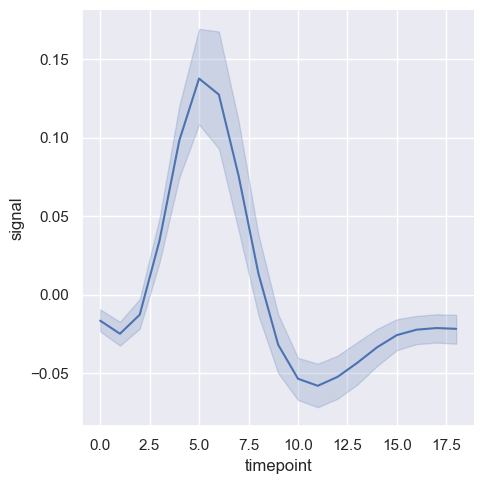

In [11]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

如果不希望显示置信区间, 可以设置 `errorbar=None`

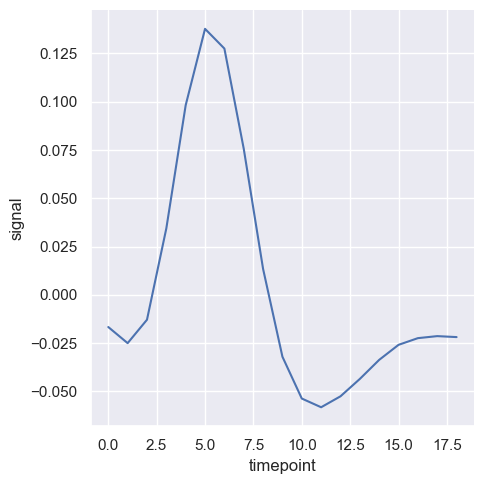

In [12]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line", errorbar=None)

另一个不错的选择，尤其是在处理较大数据时，是通过绘制标准差而不是置信区间来表示每个时间点的分布范围。

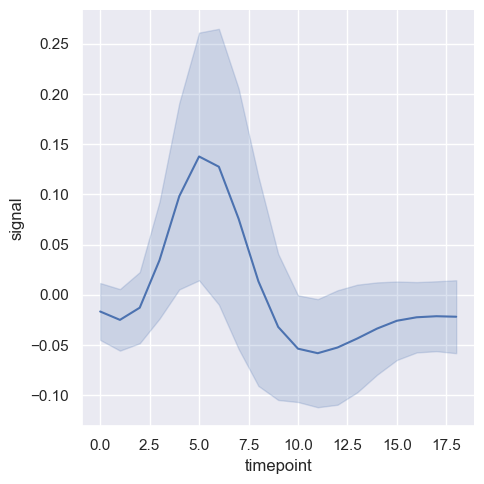

In [13]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    errorbar="sd",
)

在 Seaborn 中，`errorbar` 参数用于控制误差棒的显示方式。除了 `"sd"`（表示标准差）以外，还有以下几种常见的选项：

1. **"ci"**: 置信区间（Confidence Interval）。这是 Seaborn 的默认选项，通常使用 95% 的置信区间。
   
2. **"se"**: 标准误差（Standard Error）。表示均值的标准误差。

3. **"pi"**: 预测区间（Prediction Interval）。这是一个更广泛的区间，用于包含未来观测值的范围。

4. **数字**（例如 `68`, `95`）：可以指定一个自定义的置信区间的百分比。例如，`errorbar=68` 表示绘制 68% 的置信区间。

5. **`None`**: 如果你不想显示任何误差棒，可以将 `errorbar` 设置为 `None`。

这些选项允许你根据数据的特性和分析需求，自定义误差棒的显示方式，以更好地表示不确定性或数据的分布情况。

在数据可视化中，`errorbar` 参数用于表示数据的不确定性或变异性。`sd`、`ci`、`se` 和 `pi` 都是不同的统计指标，用于不同的目的，具体解释如下：

### 1. **标准差 (Standard Deviation, `sd`)**
   - **含义**: 标准差是衡量数据分布的离散程度的一种统计量。它表示数据点与均值之间的平均距离。标准差越大，数据的离散程度越高。
   - **表示**: 在误差棒中，使用标准差意味着你展示的是数据在该点周围的分布范围，反映了数据的离散性，但不涉及置信度。
   - **适用场景**: 通常用于说明数据的自然变异性或噪声水平，而不是推断统计结论。

### 2. **置信区间 (Confidence Interval, `ci`)**
   - **含义**: 置信区间表示估计值所在范围内的可信程度，通常是指包含总体参数（如均值）的范围。95% 置信区间表示有 95% 的可能性，真实均值在该区间内。
   - **表示**: 在误差棒中，置信区间通常表示均值周围的范围，显示的是均值的不确定性，而不是个别数据点的变异性。
   - **适用场景**: 置信区间广泛用于推断统计结论，如比较不同组之间的差异时，展示均值的不确定性。

### 3. **标准误差 (Standard Error, `se`)**
   - **含义**: 标准误差是均值的标准偏差，反映样本均值相对于总体均值的变异性。它衡量的是均值的准确性，而不是单个数据点的离散性。
   - **表示**: 在误差棒中，使用标准误差可以展示均值的不确定性，比标准差更适合于描述均值的精确度。
   - **适用场景**: 适用于需要展示样本均值相对于总体均值的可靠性时，如在样本量较大时，用标准误差会比标准差更能反映均值的精度。

### 4. **预测区间 (Prediction Interval, `pi`)**
   - **含义**: 预测区间表示未来单个观测值的可能范围，而不是均值的范围。它通常比置信区间宽，因为它需要考虑数据的总体变异性和未来观测的不确定性。
   - **表示**: 在误差棒中，预测区间反映的是未来某个具体值可能出现的范围，适用于预测和模型验证。
   - **适用场景**: 适用于时间序列预测或其他需要预测未来观测值的情境，通常用于模型的外推或验证。

### 比较总结
- **标准差 (`sd`)**: 描述数据的离散性，适合用于展示数据的自然变异。
- **置信区间 (`ci`)**: 描述均值的可靠性，适合用于推断统计结论。
- **标准误差 (`se`)**: 描述样本均值的准确性，适合用于展示均值的精度。
- **预测区间 (`pi`)**: 描述未来观测值的范围，适合用于预测和模型验证。

通过这些不同的误差棒选项，你可以根据数据分析的具体需求，选择最合适的统计指标来展示数据的不确定性和变异性。

通过设置 `estimator` 为 `None` 可以关闭聚合计算.

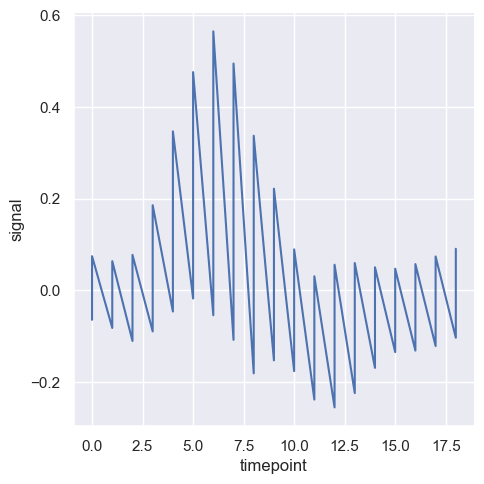

In [14]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    estimator=None,
)

在 Seaborn 中，`estimator` 参数用于指定如何对数据进行聚合或计算，以便在图表中显示汇总值。这个参数通常与 `errorbar` 配合使用，用来定义显示误差棒时应如何计算中心趋势或分布范围。以下是一些常见的 `estimator` 及其含义：

### 1. **`mean` (均值)**
   - **含义**: 计算数据的平均值，是数据中心趋势的常用指标。
   - **适用场景**: 当你希望展示总体数据的中心趋势时，使用均值是最常见的选择。默认情况下，Seaborn 的 `estimator` 就是 `mean`。

### 2. **`median` (中位数)**
   - **含义**: 数据的中位数，即将数据按大小排序后处于中间位置的值。
   - **适用场景**: 当数据存在异常值或分布偏斜时，中位数比均值更能代表数据的中心趋势。

### 3. **`sum` (总和)**
   - **含义**: 计算数据的总和。
   - **适用场景**: 适用于需要展示总体数据的总量或累积值的情况。

### 4. **`min` (最小值)**
   - **含义**: 计算数据中的最小值。
   - **适用场景**: 当你需要展示数据的最低界限或最低点时，可以使用最小值作为 `estimator`。

### 5. **`max` (最大值)**
   - **含义**: 计算数据中的最大值。
   - **适用场景**: 当你需要展示数据的最高界限或最高点时，可以使用最大值作为 `estimator`。

### 6. **`std` (标准差)**
   - **含义**: 计算数据的标准差，表示数据的离散程度。
   - **适用场景**: 适用于展示数据的变异性或离散程度，特别是在分析数据分布时。

### 7. **`var` (方差)**
   - **含义**: 计算数据的方差，表示数据的离散程度。
   - **适用场景**: 与标准差类似，但它表示的是离散程度的平方。

### 8. **`count` (计数)**
   - **含义**: 计算数据点的数量。
   - **适用场景**: 当你需要展示某个类别或组的频率时，计数是一个有用的指标。

### 9. **`None`**
   - **含义**: 不进行任何聚合，直接绘制数据点。
   - **适用场景**: 当你希望展示原始数据的所有点而不进行任何聚合时，可以将 `estimator` 设置为 `None`。

### 自定义函数
你还可以传入自定义函数作为 `estimator`。这个函数将应用于每个 x 变量的分组数据，返回一个聚合结果。

### 选择 `estimator` 的原则

- **均值 (`mean`) 和中位数 (`median`)**: 常用于描述数据的中心趋势。
- **总和 (`sum`) 和计数 (`count`)**: 用于累积或频率分析。
- **最小值 (`min`) 和最大值 (`max`)**: 用于展示数据范围。
- **标准差 (`std`) 和方差 (`var`)**: 用于分析数据的离散性。

通过选择适当的 `estimator`，你可以更好地聚合和展示数据，突出数据的某些特性或趋势。

### 使用语义映射绘制数据子集

`lineplot()` 函数具有与 `scatterplot()` 相同的灵活性：它可以通过修改图形元素的色调（`hue`）、大小（`size`）和样式（`style`）来显示多达三个附加变量。它使用与 `scatterplot()` 相同的 API，这意味着我们不需要特意区分 Matplotlib 中控制线条和点的参数。

在 `lineplot()` 中使用语义（semantics）还会决定数据的聚合方式。例如，添加一个具有两个级别的 `hue` 语义会将图形分成两条线和误差带，并使用不同的颜色来表示它们对应的数据子集。

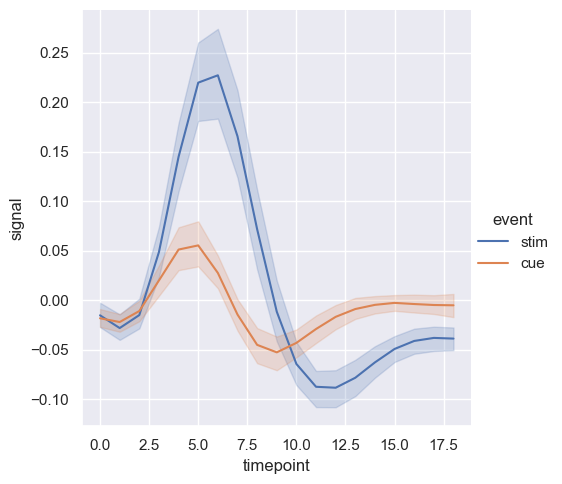

In [15]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    hue="event",
)

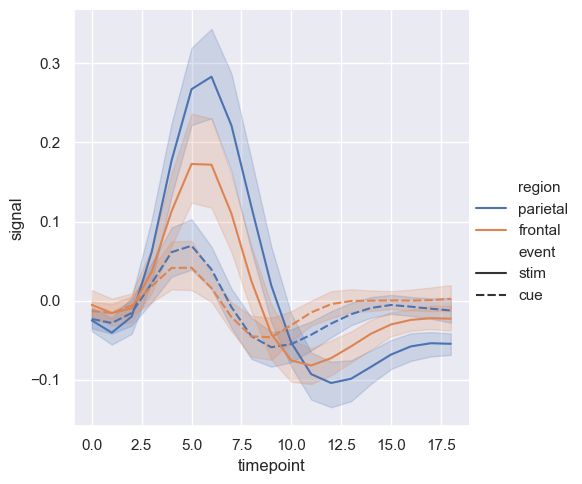

In [16]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
)

但是，你可以通过在每个观测点使用的标记（marker）来识别数据子集，这些标记可以与虚线一起使用，或者替代虚线。

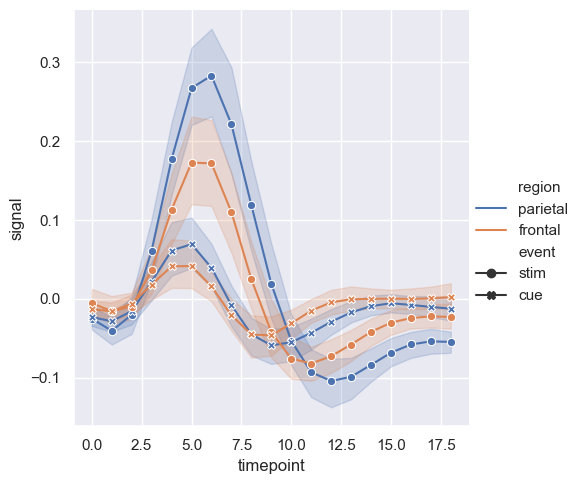

In [17]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
    dashes=False,
    markers=True,
)

与散点图一样，在使用多个语义进行折线图时需要谨慎。虽然有时这些图表能够提供有用的信息，但它们也可能难以解析和理解。不过，即使你只是检查一个额外变量的变化，改变线条的颜色和样式也可能会有帮助。这可以使图表在打印成黑白或由色盲的人观看时更易于理解。

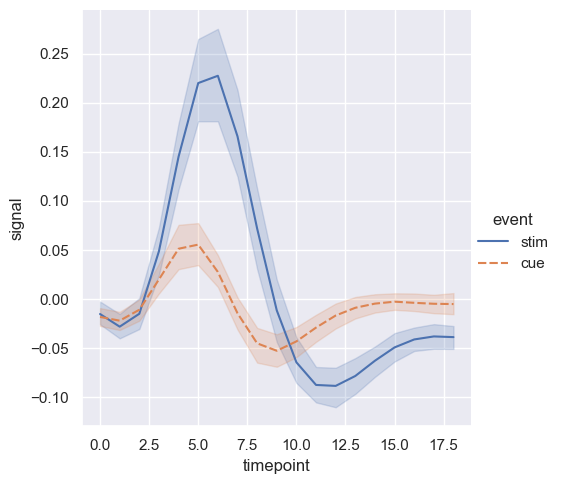

In [18]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    hue="event",
    style="event",
)

`units` 参数用于指定在数据集中表示“重复测量单位”的变量。也就是说，当你有一个数据集，其中同一个观测对象被多次采样时（例如，一个人在多个时间点上被测量），`units` 参数帮助绘图函数识别这些观测对象，并对它们进行分别绘制，而不使用颜色、样式等语义来区分它们。

通过使用 `units` 参数，可以避免在图例（legend）中生成多余的条目，因为每个测量单位的曲线会被单独绘制，但不会因不同的颜色或样式而引入新的图例项。这有助于保持图表的清晰和简洁，特别是在处理大量重复测量数据时。

总结来说，`units` 参数的作用是告诉绘图函数哪些数据点属于同一个测量单位，并允许这些数据点在图中以一致的方式显示，而不影响图例的简洁性。

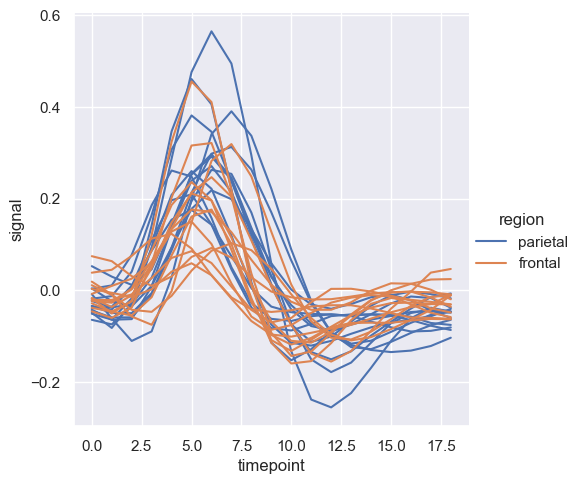

In [19]:
sns.relplot(
    data=fmri.query("event == 'stim'"),
    kind="line",
    x="timepoint",
    y="signal",
    hue="region",
    units="subject",
    estimator=None,
)

### 控制排序和方向

In [20]:
healthexp = pd.read_csv("../../data/healthexp.csv")

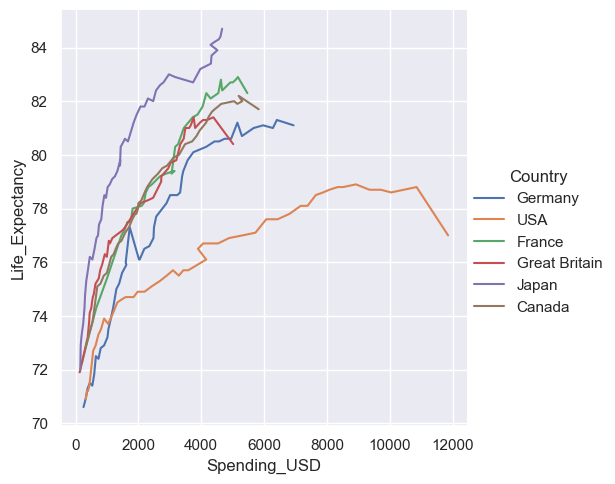

In [25]:
sns.relplot(
    data=healthexp.sort_values("Year"),
    kind="line",
    x="Spending_USD",
    y="Life_Expectancy",
    hue="Country",
    sort=False,
)

上面的代码看不出来 `sort` 的作用, 下面的例子可以清晰的说明这个参数的用途.

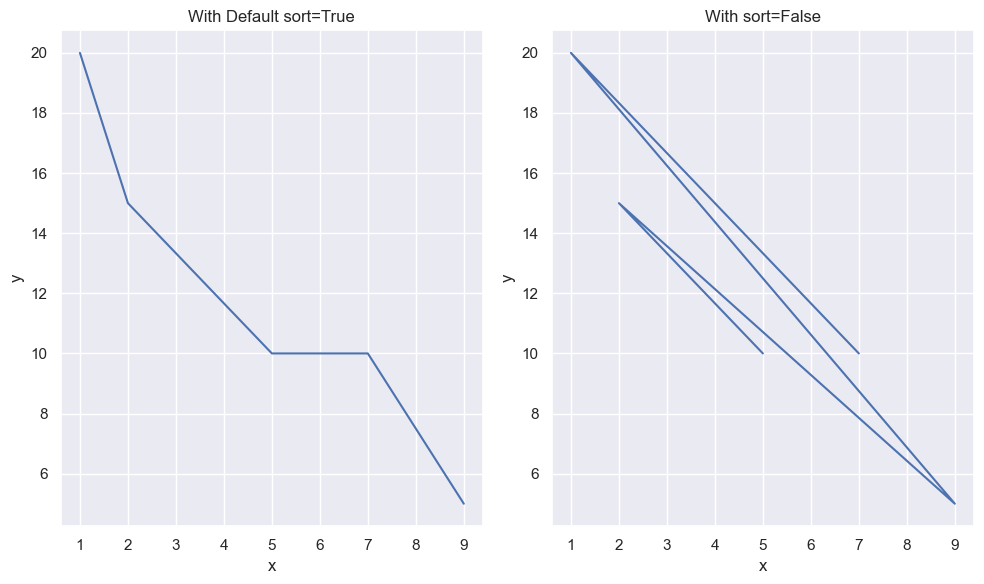

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 创建一个小的数据集，其中 x 轴数据不是按顺序排列的
data = pd.DataFrame({"x": [5, 2, 9, 1, 7], "y": [10, 15, 5, 20, 10]})

# 创建一个图形，并将其分为一行两列
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# 使用默认的 sort=True
sns.lineplot(x="x", y="y", data=data, ax=axes[0])
axes[0].set_title("With Default sort=True")

# 使用 sort=False
sns.lineplot(x="x", y="y", data=data, sort=False, ax=axes[1])
axes[1].set_title("With sort=False")

plt.tight_layout()
plt.show()

## 通过分面展示多个关系 - Showing multiple relationships with Facets

我们在本教程中强调过，虽然这些函数可以同时显示多个语义变量，但这样做并不总是有效。那么，当你确实想要了解两个变量之间的关系如何依赖于多个其他变量时，该怎么办呢？

最好的方法可能是制作多个图表。由于 `relplot()` 基于 `FacetGrid`，这很容易实现。为了展示附加变量的影响，可以将其用于“分面”可视化，而不是将其分配给图中的某个语义角色。这意味着你可以创建多个坐标轴，并在每个坐标轴上绘制数据的子集：

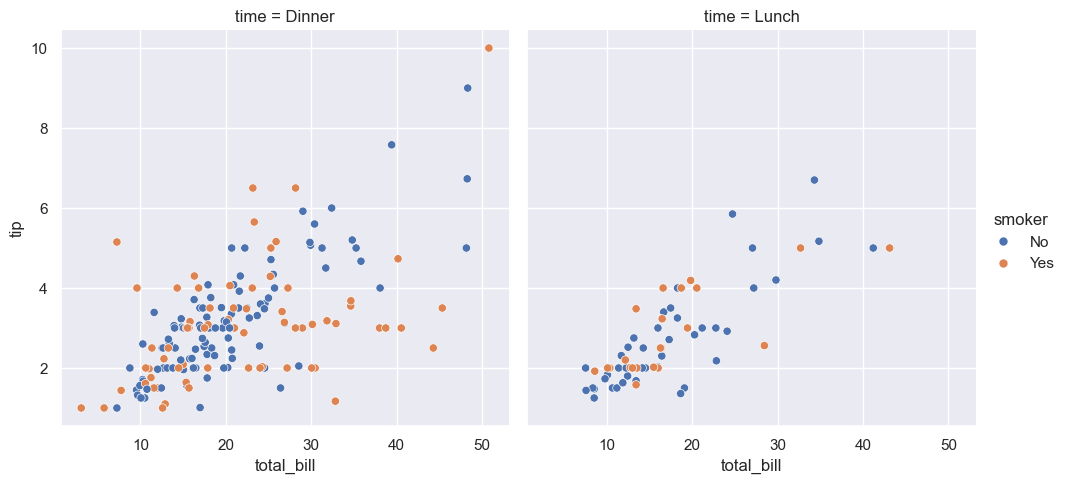

In [26]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
)

你还可以通过这种方式展示两个变量的影响：一个通过在列上分面，另一个通过在行上分面。当你开始向网格中添加更多变量时，可能需要减小图形的尺寸。请记住，`FacetGrid` 的大小是由每个分面的高度和纵横比参数化的。

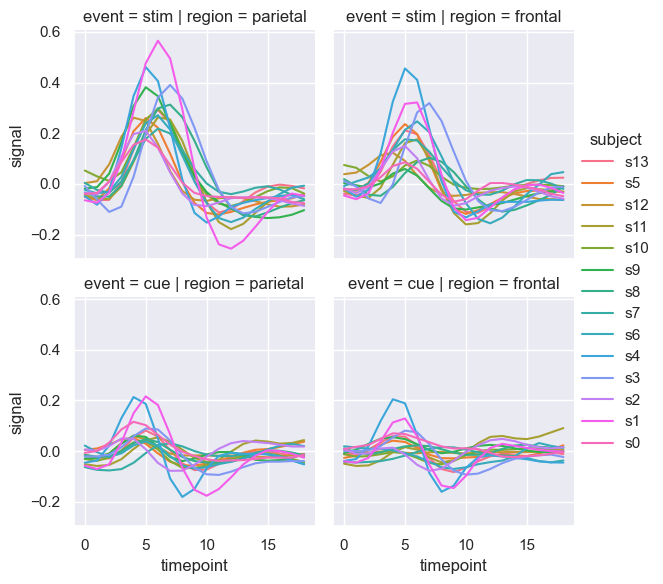

In [27]:
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    hue="subject",
    col="region",
    row="event",
    height=3,
    estimator=None,
)

当你想要检查一个变量的多个层级的影响时，将该变量在列上分面，然后将这些分面“包裹”到行中，是一个不错的选择。

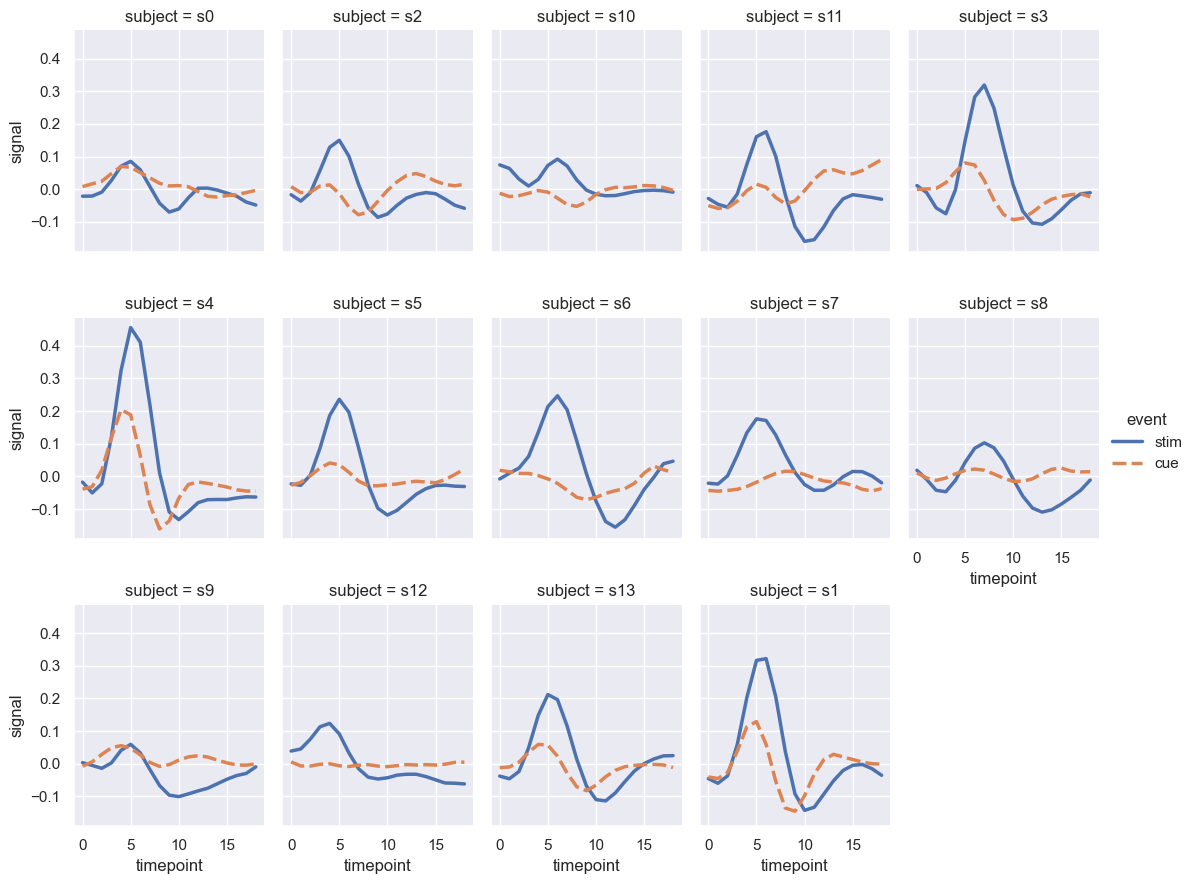

In [28]:
sns.relplot(
    data=fmri.query("region == 'frontal'"),
    kind="line",
    x="timepoint",
    y="signal",
    hue="event",
    style="event",
    col="subject",
    col_wrap=5,
    height=3,
    aspect=0.75,
    linewidth=2.5,
)